In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam


Bad key "text.kerning_factor" on line 4 in
C:\Users\Michael Ho\anaconda3\envs\PHYS247\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
Data=pd.read_csv('LendingClub.csv')
Data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Fully Paid,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Fully Paid,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Fully Paid,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Fully Paid,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Charged Off,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [3]:
#First check if there's any missing data
Data.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [4]:
#Check the datatype in the Data
Data.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
purpose                  object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [5]:
#Convert the term and address into integer
Data['term']=Data['term'].str.slice(0,2)
Data['term']=Data['term'].astype(int)
Data['address']=Data['address'].str.slice(-5)
Data['address']=Data['address'].astype(int)
Data['earliest_cr_line']=Data['earliest_cr_line'].str.slice(-2)
Data['earliest_cr_line']=Data['earliest_cr_line'].astype(int)

In [6]:
X=Data.drop(columns=['grade','loan_status'])
Y=Data['loan_status']

In [7]:
#Build one-hot encoded vectors
Y=pd.get_dummies(Y)
X=pd.get_dummies(X,columns=['sub_grade','home_ownership','verification_status','purpose','initial_list_status','application_type'],
               prefix=['subgrade','ownership','verifcation','purpose','initialstatus','application'])

In [8]:
#Split the data to 70% training and 30% test
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler=MinMaxScaler()

In [12]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
Y_train=scaler.fit_transform(Y_train)
Y_test=scaler.fit_transform(Y_test)

In [13]:
X_train.shape

(276653, 78)

In [14]:
X_train=utils.normalize(X_train,axis=1)
X_test=utils.normalize(X_test,axis=1)

In [15]:
model=Sequential()

model.add(Flatten())

model.add(Dense(78,activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
model.fit(x=X_train,y=Y_train,validation_data=(X_test,Y_test),batch_size=64,epochs=10)

Epoch 1/10
4323/4323 [==============================] - 13s 3ms/step - loss: 0.4065 - accuracy: 0.8371 - val_loss: 0.3811 - val_accuracy: 0.8556
Epoch 2/10
4323/4323 [==============================] - 12s 3ms/step - loss: 0.3711 - accuracy: 0.8579 - val_loss: 0.3615 - val_accuracy: 0.8601
Epoch 3/10
4323/4323 [==============================] - 12s 3ms/step - loss: 0.3624 - accuracy: 0.8594 - val_loss: 0.3605 - val_accuracy: 0.8600
Epoch 4/10
4323/4323 [==============================] - 13s 3ms/step - loss: 0.3519 - accuracy: 0.8596 - val_loss: 0.3367 - val_accuracy: 0.8600
Epoch 5/10
4323/4323 [==============================] - 12s 3ms/step - loss: 0.3290 - accuracy: 0.8599 - val_loss: 0.3253 - val_accuracy: 0.8609
Epoch 6/10
4323/4323 [==============================] - 10s 2ms/step - loss: 0.3206 - accuracy: 0.8627 - val_loss: 0.3140 - val_accuracy: 0.8650
Epoch 7/10
4323/4323 [==============================] - 13s 3ms/step - loss: 0.3033 - accuracy: 0.8764 - val_loss: 0.2912 - val_ac

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  6162      
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  158       
Total params: 6,320
Trainable params: 6,320
Non-trainable params: 0
_________________________________________________________________


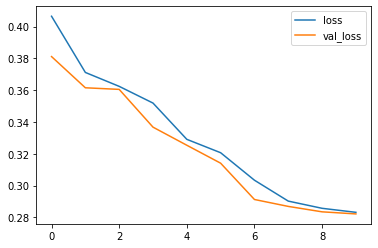

In [18]:
history=pd.DataFrame(model.history.history)
history[['loss','val_loss']].plot()

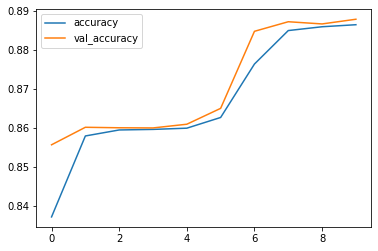

In [19]:
history[['accuracy','val_accuracy']].plot()

0     Fully Paid
1     Fully Paid
2     Fully Paid
3     Fully Paid
4    Charged Off
Name: loan_status, dtype: object